DATA PREPROCESSING MASTERCLASS

1. CREATING SAMPLE DATASET WITH COMMON DATA ISSUES
--------------------------------------------------
Dataset created with 1005 rows and 11 columns
Dataset shape: (1005, 11)

2. INITIAL DATA EXPLORATION
--------------------------------------------------
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        1005 non-null   int64         
 1   age                956 non-null    float64       
 2   income             954 non-null    float64       
 3   credit_score       1005 non-null   float64       
 4   education          1005 non-null   object        
 5   employment_status  1005 non-null   object        
 6   loan_amount        1005 non-null   float64       
 7   previous_loans     1005 non-null   int32         
 8   region             1005 non-null   obj

,customer_id,age,income,credit_score,education,employment_status,loan_amount,previous_loans,region,approval_status,application_date
0,1,40.960570,9165.056757,619.079092,PhD,Self-employed,33877.393091,4,south,1,2020-01-01
1,2,33.340828,NaN,574.784359,High School,Self-employed,33439.543357,0,NORTH,1,2020-01-02
2,3,42.772262,50589.205735,681.917451,PhD,Student,8049.383003,2,NORTH,0,2020-01-03
3,4,53.276358,61289.746976,784.045045,high school,Self-employed,25390.546816,1,NORTH,1,2020-01-04
4,5,32.190160,1604.787337,462.482753,high school,,3431.175652,3,West,1,2020-01-05



Dataset shape: (1005, 11)

Column names:
['customer_id', 'age', 'income', 'credit_score', 'education', 'employment_status', 'loan_amount', 'previous_loans', 'region', 'approval_status', 'application_date']

Data types:
customer_id                   int64
age                         float64
income                      float64
credit_score                float64
education                    object
employment_status            object
loan_amount                 float64
previous_loans                int32
region                       object
approval_status               int32
application_date     datetime64[ns]
dtype: object

Basic statistics:
       customer_id         age         income  credit_score    loan_amount  \
count  1005.000000  956.000000     954.000000   1005.000000    1005.000000   
mean    498.024876   36.820400   57554.281606    651.322650   19853.083641   
min       1.000000   -3.895208     161.172668    348.048784     267.894040   
25%     247.000000   27.657974   14469.

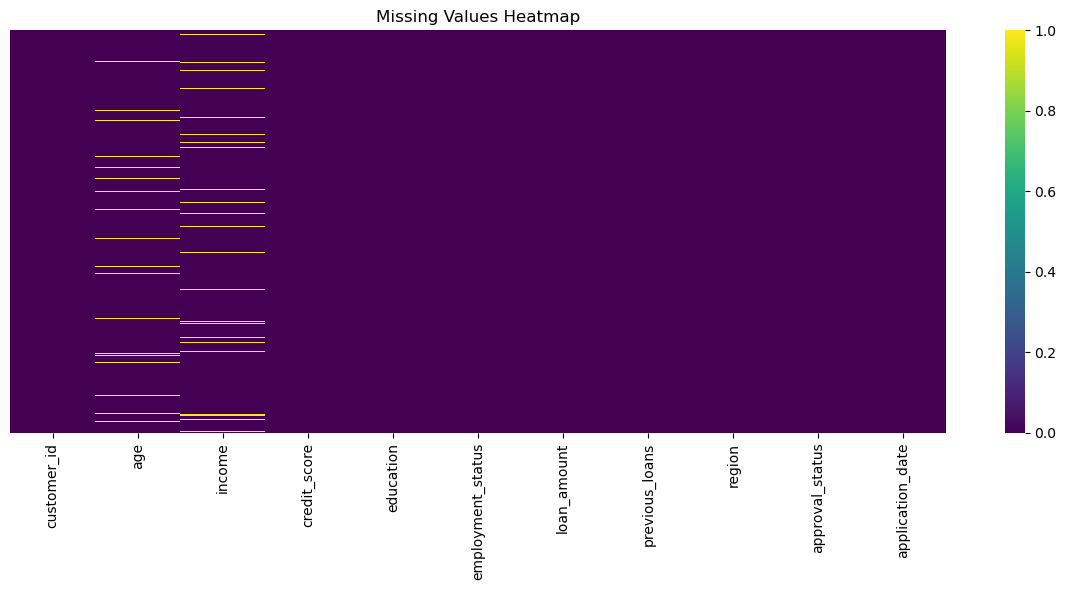


Strategy 1: Removing rows with >50% missing values
Rows after removal: 1005

Strategy 2: Imputing missing values
Filled age missing values with median: 35.58
Filled income missing values with median: 36601.76

Advanced imputation using KNN for numerical data:
KNN imputation completed for numerical columns

4. HANDLING DUPLICATES
--------------------------------------------------
Duplicate rows before removal: 5
Rows after duplicate removal: 1000
Duplicates based on customer_id: 0

5. DATA TYPE CONVERSIONS
--------------------------------------------------
Data types before conversion:
customer_id                   int64
age                         float64
income                      float64
credit_score                float64
education                    object
employment_status            object
loan_amount                 float64
previous_loans                int32
region                       object
approval_status               int32
application_date     datetime64[ns]
dtype: obje

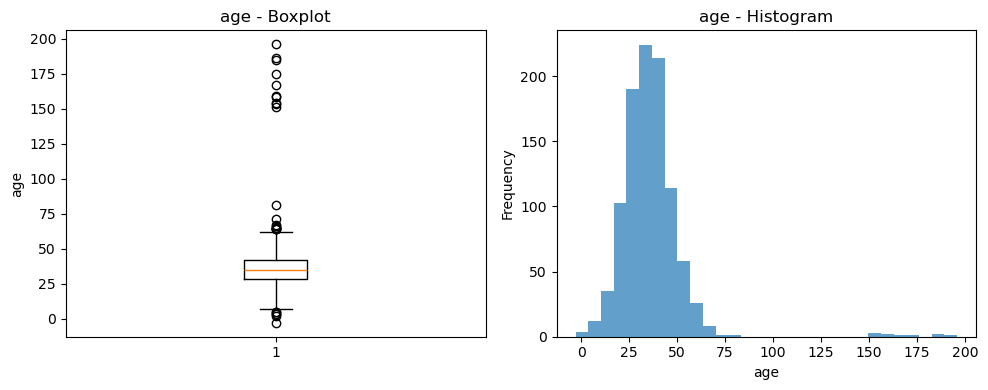

income: 65 outliers (bounds: -62822.51 - 145095.21)


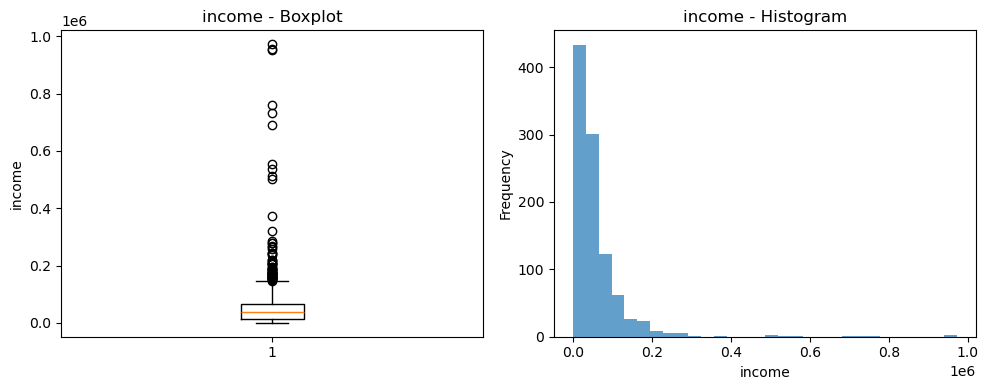

credit_score: 9 outliers (bounds: 389.43 - 912.91)


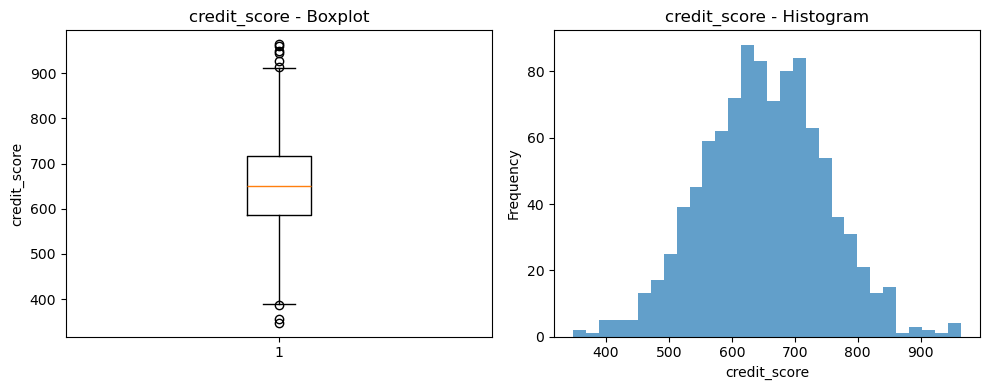

loan_amount: 34 outliers (bounds: -15643.96 - 52085.23)


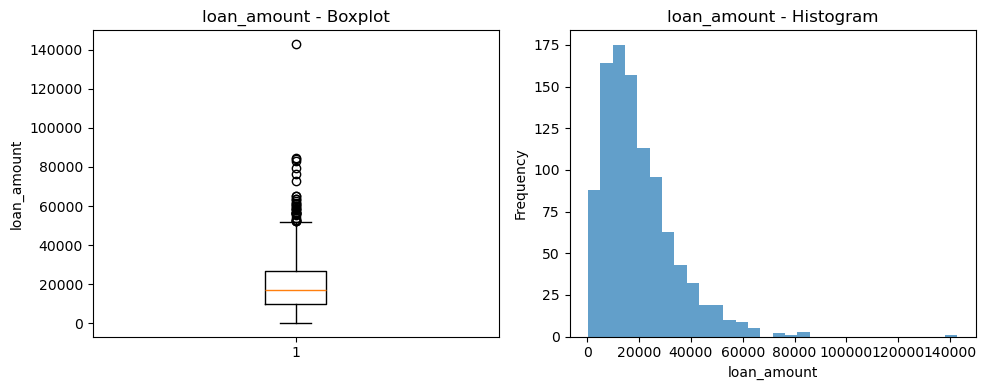


Handling outliers using capping method:
age: Outliers capped to range [7.00, 63.00]
income: Outliers capped to range [-62822.51, 145095.21]
credit_score: Outliers capped to range [389.43, 912.91]
loan_amount: Outliers capped to range [-15643.96, 52085.23]

7. DATA STANDARDIZATION AND CLEANING
--------------------------------------------------
Standardizing categorical values:
Unique values after standardization:
education: ['phd' 'high_school' 'bachelor' 'master']
region: ['south' 'north' 'west' 'east']
employment_status: ['Self-employed' 'Student' 'Unknown' 'Employed' 'Unemployed']

8. FEATURE ENGINEERING
--------------------------------------------------
New features created:
- age_group
- income_category
- debt_to_income
- credit_category
- application_year
- application_month
- application_day_of_week
- has_previous_loans
- high_income

9. ENCODING CATEGORICAL VARIABLES
--------------------------------------------------
Label Encoding for ordinal variables:
Encoded education: {'hi

In [3]:
# Complete Data Preprocessing Masterclass
# This code covers ALL essential data preprocessing techniques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, RobustScaler, 
                                 LabelEncoder, OneHotEncoder, OrdinalEncoder)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("=" * 60)
print("DATA PREPROCESSING MASTERCLASS")
print("=" * 60)

# =============================================================================
# STEP 1: DATASET CREATION (Simulating Real-world Messy Data)
# =============================================================================
print("\n1. CREATING SAMPLE DATASET WITH COMMON DATA ISSUES")
print("-" * 50)

# Create a realistic dataset with various data quality issues
np.random.seed(42)
n_samples = 1000

# Generate sample data with intentional issues
data = {
    'customer_id': range(1, n_samples + 1),
    'age': np.random.normal(35, 12, n_samples),
    'income': np.random.exponential(50000, n_samples),
    'credit_score': np.random.normal(650, 100, n_samples),
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD', 'high school', 'bachelor'], n_samples),
    'employment_status': np.random.choice(['Employed', 'Unemployed', 'Self-employed', 'Student', ''], n_samples),
    'loan_amount': np.random.gamma(2, 10000, n_samples),
    'previous_loans': np.random.poisson(2, n_samples),
    'region': np.random.choice(['North', 'South', 'East', 'West', 'NORTH', 'south'], n_samples),
    'approval_status': np.random.choice([0, 1], n_samples),
    'application_date': pd.date_range('2020-01-01', periods=n_samples, freq='D')
}

df = pd.DataFrame(data)

# Introduce missing values intentionally
missing_indices = np.random.choice(df.index, size=int(0.1 * len(df)), replace=False)
df.loc[missing_indices[:50], 'age'] = np.nan
df.loc[missing_indices[50:100], 'income'] = np.nan
df.loc[missing_indices[100:150], 'credit_score'] = np.nan
df.loc[missing_indices[150:], 'employment_status'] = np.nan

# Introduce outliers
outlier_indices = np.random.choice(df.index, size=20, replace=False)
df.loc[outlier_indices[:10], 'age'] = np.random.uniform(150, 200, 10)
df.loc[outlier_indices[10:], 'income'] = np.random.uniform(500000, 1000000, 10)

# Add some duplicate rows
df = pd.concat([df, df.iloc[:5]], ignore_index=True)

print(f"Dataset created with {len(df)} rows and {len(df.columns)} columns")
print(f"Dataset shape: {df.shape}")

# =============================================================================
# STEP 2: INITIAL DATA EXPLORATION
# =============================================================================
print("\n2. INITIAL DATA EXPLORATION")
print("-" * 50)

# Basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\nFirst 5 rows:")
display(df.head())

print("\nDataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nBasic statistics:")
print(df.describe())

# =============================================================================
# STEP 3: HANDLING MISSING VALUES
# =============================================================================
print("\n3. HANDLING MISSING VALUES")
print("-" * 50)

# Check for missing values
print("Missing values count:")
missing_count = df.isnull().sum()
print(missing_count[missing_count > 0])

print("\nMissing values percentage:")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0])

# Visualize missing values pattern
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

# Strategy 1: Drop rows with too many missing values
print("\nStrategy 1: Removing rows with >50% missing values")
threshold = 0.5 * len(df.columns)
df_clean = df.dropna(thresh=threshold)
print(f"Rows after removal: {len(df_clean)}")

# Strategy 2: Fill missing values with different methods
print("\nStrategy 2: Imputing missing values")

# Numerical columns - Mean imputation
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"Filled {col} missing values with median: {median_val:.2f}")

# Categorical columns - Mode imputation
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()[0] if len(df_clean[col].mode()) > 0 else 'Unknown'
        df_clean[col].fillna(mode_val, inplace=True)
        print(f"Filled {col} missing values with mode: {mode_val}")

# Advanced imputation using KNN
print("\nAdvanced imputation using KNN for numerical data:")
numerical_data = df_clean[numerical_cols].copy()
knn_imputer = KNNImputer(n_neighbors=5)
numerical_data_imputed = pd.DataFrame(knn_imputer.fit_transform(numerical_data), 
                                    columns=numerical_cols, index=numerical_data.index)

print("KNN imputation completed for numerical columns")

# =============================================================================
# STEP 4: HANDLING DUPLICATES
# =============================================================================
print("\n4. HANDLING DUPLICATES")
print("-" * 50)

print(f"Duplicate rows before removal: {df_clean.duplicated().sum()}")
df_clean = df_clean.drop_duplicates()
print(f"Rows after duplicate removal: {len(df_clean)}")

# Check for duplicates based on specific columns
print(f"Duplicates based on customer_id: {df_clean.duplicated(subset=['customer_id']).sum()}")

# =============================================================================
# STEP 5: DATA TYPE CONVERSIONS
# =============================================================================
print("\n5. DATA TYPE CONVERSIONS")
print("-" * 50)

print("Data types before conversion:")
print(df_clean.dtypes)

# Convert data types
df_clean['customer_id'] = df_clean['customer_id'].astype(str)
df_clean['age'] = df_clean['age'].astype(int)
df_clean['previous_loans'] = df_clean['previous_loans'].astype(int)
df_clean['approval_status'] = df_clean['approval_status'].astype(bool)
df_clean['application_date'] = pd.to_datetime(df_clean['application_date'])

print("\nData types after conversion:")
print(df_clean.dtypes)

# =============================================================================
# STEP 6: HANDLING OUTLIERS
# =============================================================================
print("\n6. HANDLING OUTLIERS")
print("-" * 50)

def detect_outliers_iqr(df, column):
    """Detect outliers using Interquartile Range method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(df, column, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

# Detect outliers in numerical columns
outlier_columns = ['age', 'income', 'credit_score', 'loan_amount']

print("Outlier detection using IQR method:")
for col in outlier_columns:
    outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    print(f"{col}: {len(outliers)} outliers (bounds: {lower:.2f} - {upper:.2f})")
    
    # Visualize outliers
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.boxplot(df_clean[col].dropna())
    plt.title(f'{col} - Boxplot')
    plt.ylabel(col)
    
    plt.subplot(1, 2, 2)
    plt.hist(df_clean[col].dropna(), bins=30, alpha=0.7)
    plt.title(f'{col} - Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Handle outliers - Capping method
print("\nHandling outliers using capping method:")
df_no_outliers = df_clean.copy()

for col in outlier_columns:
    outliers, lower, upper = detect_outliers_iqr(df_no_outliers, col)
    # Cap the values
    df_no_outliers[col] = np.where(df_no_outliers[col] < lower, lower, df_no_outliers[col])
    df_no_outliers[col] = np.where(df_no_outliers[col] > upper, upper, df_no_outliers[col])
    print(f"{col}: Outliers capped to range [{lower:.2f}, {upper:.2f}]")

# =============================================================================
# STEP 7: DATA STANDARDIZATION AND CLEANING
# =============================================================================
print("\n7. DATA STANDARDIZATION AND CLEANING")
print("-" * 50)

# Clean categorical data - standardize case and values
print("Standardizing categorical values:")

# Education column
df_no_outliers['education'] = df_no_outliers['education'].str.lower().str.strip()
df_no_outliers['education'] = df_no_outliers['education'].replace({
    'high school': 'high_school',
    'bachelor': 'bachelor',
    'master': 'master',
    'phd': 'phd'
})

# Region column
df_no_outliers['region'] = df_no_outliers['region'].str.lower().str.strip()

# Employment status - handle empty strings
df_no_outliers['employment_status'] = df_no_outliers['employment_status'].replace('', 'Unknown')

print("Unique values after standardization:")
for col in ['education', 'region', 'employment_status']:
    print(f"{col}: {df_no_outliers[col].unique()}")

# =============================================================================
# STEP 8: FEATURE ENGINEERING
# =============================================================================
print("\n8. FEATURE ENGINEERING")
print("-" * 50)

# Create new features
df_engineered = df_no_outliers.copy()

# Age groups
df_engineered['age_group'] = pd.cut(df_engineered['age'], 
                                  bins=[0, 25, 35, 50, 100], 
                                  labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

# Income categories
df_engineered['income_category'] = pd.cut(df_engineered['income'], 
                                        bins=[0, 30000, 60000, 100000, np.inf], 
                                        labels=['Low', 'Medium', 'High', 'Very High'])

# Debt-to-income ratio
df_engineered['debt_to_income'] = df_engineered['loan_amount'] / df_engineered['income']

# Credit score categories
df_engineered['credit_category'] = pd.cut(df_engineered['credit_score'], 
                                        bins=[0, 580, 670, 740, 850], 
                                        labels=['Poor', 'Fair', 'Good', 'Excellent'])

# Date features
df_engineered['application_year'] = df_engineered['application_date'].dt.year
df_engineered['application_month'] = df_engineered['application_date'].dt.month
df_engineered['application_day_of_week'] = df_engineered['application_date'].dt.day_name()

# Boolean features
df_engineered['has_previous_loans'] = df_engineered['previous_loans'] > 0
df_engineered['high_income'] = df_engineered['income'] > df_engineered['income'].quantile(0.75)

print("New features created:")
new_features = ['age_group', 'income_category', 'debt_to_income', 'credit_category', 
               'application_year', 'application_month', 'application_day_of_week',
               'has_previous_loans', 'high_income']
for feature in new_features:
    print(f"- {feature}")

# =============================================================================
# STEP 9: ENCODING CATEGORICAL VARIABLES
# =============================================================================
print("\n9. ENCODING CATEGORICAL VARIABLES")
print("-" * 50)

df_encoded = df_engineered.copy()

# Label Encoding for ordinal variables
print("Label Encoding for ordinal variables:")
ordinal_mappings = {
    'education': {'high_school': 1, 'bachelor': 2, 'master': 3, 'phd': 4},
    'credit_category': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'income_category': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
}

for col, mapping in ordinal_mappings.items():
    df_encoded[f'{col}_encoded'] = df_encoded[col].map(mapping)
    print(f"Encoded {col}: {mapping}")

# One-hot encoding for nominal variables
print("\nOne-hot encoding for nominal variables:")
nominal_cols = ['region', 'employment_status', 'age_group', 'application_day_of_week']

for col in nominal_cols:
    # Create dummy variables
    dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    print(f"One-hot encoded {col}: {list(dummies.columns)}")

# Binary encoding for boolean variables
bool_cols = ['approval_status', 'has_previous_loans', 'high_income']
for col in bool_cols:
    df_encoded[f'{col}_binary'] = df_encoded[col].astype(int)

print("\nEncoding completed")

# =============================================================================
# STEP 10: FEATURE SCALING/NORMALIZATION
# =============================================================================
print("\n10. FEATURE SCALING/NORMALIZATION")
print("-" * 50)

# Select numerical features for scaling
numerical_features = ['age', 'income', 'credit_score', 'loan_amount', 
                     'previous_loans', 'debt_to_income']

# Different scaling methods
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

scaled_data = {}

for scaler_name, scaler in scalers.items():
    scaled_features = scaler.fit_transform(df_encoded[numerical_features])
    scaled_df = pd.DataFrame(scaled_features, 
                           columns=[f'{col}_{scaler_name.lower()}' for col in numerical_features],
                           index=df_encoded.index)
    scaled_data[scaler_name] = scaled_df
    
    print(f"\n{scaler_name} - Sample statistics:")
    print(f"Mean: {scaled_features.mean(axis=0)}")
    print(f"Std: {scaled_features.std(axis=0)}")

# Add scaled features to main dataframe
for scaler_name, scaled_df in scaled_data.items():
    df_encoded = pd.concat([df_encoded, scaled_df], axis=1)

# =============================================================================
# STEP 11: FEATURE SELECTION
# =============================================================================
print("\n11. FEATURE SELECTION")
print("-" * 50)

# Prepare features and target
feature_cols = [col for col in df_encoded.columns if col not in ['customer_id', 'application_date', 
                                                               'approval_status', 'education', 
                                                               'region', 'employment_status',
                                                               'age_group', 'income_category',
                                                               'credit_category', 'application_day_of_week']]

# Remove non-numeric columns for correlation analysis
numeric_feature_cols = df_encoded[feature_cols].select_dtypes(include=[np.number]).columns

X = df_encoded[numeric_feature_cols].fillna(0)
y = df_encoded['approval_status_binary']

print(f"Features for selection: {len(numeric_feature_cols)}")

# Method 1: Correlation-based selection
print("\nMethod 1: Correlation-based feature selection")
correlation_matrix = X.corrwith(y).abs().sort_values(ascending=False)
top_corr_features = correlation_matrix.head(10)
print("Top 10 features by correlation with target:")
print(top_corr_features)

# Method 2: Univariate feature selection
print("\nMethod 2: Univariate feature selection (SelectKBest)")
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print(f"Selected features: {selected_features}")

# Method 3: Recursive Feature Elimination
print("\nMethod 3: Recursive Feature Elimination (RFE)")
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)
rfe_features = X.columns[rfe.support_].tolist()
print(f"RFE selected features: {rfe_features}")

# Feature importance from Random Forest
rf.fit(X, y)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 features by Random Forest importance:")
print(feature_importance.head(10))

# =============================================================================
# STEP 12: DATA VALIDATION AND QUALITY CHECKS
# =============================================================================
print("\n12. DATA VALIDATION AND QUALITY CHECKS")
print("-" * 50)

def data_quality_report(df):
    """Generate a comprehensive data quality report"""
    print("DATA QUALITY REPORT")
    print("=" * 40)
    
    # Basic info
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print(f"\nMissing values: {missing_values.sum()} ({missing_values.sum()/len(df)*100:.2f}%)")
        print(missing_values[missing_values > 0])
    else:
        print("\nNo missing values found ✓")
    
    # Duplicates
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"\nDuplicate rows: {duplicates}")
    else:
        print("\nNo duplicate rows found ✓")
    
    # Data types
    print(f"\nData types:")
    print(df.dtypes.value_counts())
    
    # Unique values in categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print(f"\nCategorical columns unique values:")
        for col in categorical_cols[:5]:  # Show first 5 only
            unique_count = df[col].nunique()
            print(f"  {col}: {unique_count} unique values")
    
    return df

# Run quality check on final dataset
final_df = data_quality_report(df_encoded)

# =============================================================================
# STEP 13: SAVE PROCESSED DATA
# =============================================================================
print("\n13. SAVE PROCESSED DATA")
print("-" * 50)

# Create different versions of the processed dataset
datasets_to_save = {
    'raw_data': df,
    'cleaned_data': df_clean,
    'no_outliers': df_no_outliers,
    'engineered_features': df_engineered,
    'final_processed': df_encoded
}

print("Available processed datasets:")
for name, dataset in datasets_to_save.items():
    print(f"- {name}: {dataset.shape}")

# Save the final dataset
# df_encoded.to_csv('final_processed_data.csv', index=False)
print("\nProcessed data ready for machine learning!")

# =============================================================================
# STEP 14: PREPROCESSING PIPELINE SUMMARY
# =============================================================================
print("\n14. PREPROCESSING PIPELINE SUMMARY")
print("-" * 50)

pipeline_steps = [
    "1. Dataset Creation/Loading",
    "2. Initial Data Exploration",
    "3. Missing Value Handling",
    "4. Duplicate Removal", 
    "5. Data Type Conversion",
    "6. Outlier Detection & Treatment",
    "7. Data Standardization & Cleaning",
    "8. Feature Engineering",
    "9. Categorical Variable Encoding",
    "10. Feature Scaling/Normalization",
    "11. Feature Selection",
    "12. Data Validation & Quality Checks",
    "13. Data Export/Saving"
]

print("Complete Data Preprocessing Pipeline:")
for step in pipeline_steps:
    print(f"✓ {step}")

print(f"\nFinal dataset shape: {df_encoded.shape}")
print(f"Original dataset shape: {df.shape}")
print(f"Features created: {len(df_encoded.columns) - len(df.columns)}")

print("\n" + "=" * 60)
print("DATA PREPROCESSING MASTERCLASS COMPLETED!")
print("You now have a comprehensive understanding of data preprocessing!")
print("=" * 60)